# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [22]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
from typing import Union, List, Tuple

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [23]:
def random_matrix_Ab(m:int):
    """Funkcja tworząca zestaw składający się z macierzy A (m,m) i wektora b (m,)  zawierających losowe wartości
    Parameters:
    m(int): rozmiar macierzy
    Results:
    (np.ndarray, np.ndarray): macierz o rozmiarze (m,m) i wektorem (m,)
                Jeżeli dane wejściowe niepoprawne funkcja zwraca None
    """
    if isinstance(m, int) and m > 0:
        matrix = np.random.randint(0, 100, size = (m, m))
        vector = np.random.randint(0, 100, size = (m,))
        return matrix, vector
    else:
        return None

A1, b1 = main.random_matrix_Ab(10)
A2, b2 = main.random_matrix_Ab(20)
A3, b3 = main.random_matrix_Ab(50)
A4, b4 = main.random_matrix_Ab(100)
A5, b5 = main.random_matrix_Ab(1000)

Zaimplementowano funkcję random_matrix_Ab, która generuje macierz kwadratową A o rozmiarze m x m i wektor b o wymiarach m x 1  o wartościach losowych. Wygenerowano takie macierze i wektory dla m = 10, 20, 50, 100, 1000.

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

In [24]:
def residual_norm(A:np.ndarray,x:np.ndarray, b:np.ndarray):
    """Funkcja obliczająca normę residuum dla równania postaci:
    Ax = b

      Parameters:
      A: macierz A (m,m) zawierająca współczynniki równania 
      x: wektor x (m.) zawierający rozwiązania równania 
      b: wektor b (m,) zawierający współczynniki po prawej stronie równania

      Results:
      (float)- wartość normy residuom dla podanych parametrów"""
    if isinstance(A, np.ndarray) and isinstance (x, np.ndarray) and isinstance(b, np.ndarray):
        if x.shape == b.shape and A.shape[1] == A.shape[0]:
            A1 = A @ np.transpose(x)
            res = b - A1
            return np.linalg.norm(res)
        else:
            return None
    else:
        return None

x1 = np.linalg.solve(A1, b1)
x2 = np.linalg.solve(A2, b2)
x3 = np.linalg.solve(A3, b3)
x4 = np.linalg.solve(A4, b4)
x5 = np.linalg.solve(A5, b5)

print("Normy residuum dla macierzy o rozmiarach:")
print("m = 10:", main.residual_norm(A1, x1, b1))
print("m = 20:", main.residual_norm(A2, x2, b2))
print("m = 50:", main.residual_norm(A3, x3, b3))
print("m = 100:", main.residual_norm(A4, x4, b4))
print("m = 1000:", main.residual_norm(A5, x5, b5), "\n")

print("Uwarunkowania macierzy A:")
print("m = 10:", np.linalg.cond(A1))
print("m = 20:", np.linalg.cond(A2))
print("m = 50:", np.linalg.cond(A3))
print("m = 100:", np.linalg.cond(A4))
print("m = 1000:", np.linalg.cond(A5), "\n")



Normy residuum dla macierzy o rozmiarach:
m = 10: 7.034014214903312e-14
m = 20: 2.8536939038336873e-13
m = 50: 2.151771657133368e-12
m = 100: 2.884814445323148e-12
m = 1000: 4.799469073126727e-10 

Uwarunkowania macierzy A:
m = 10: 38.5085047713268
m = 20: 178.6012558895039
m = 50: 1507.874575742603
m = 100: 1326.6315355592612
m = 1000: 104479.13736133226 



Zaimplementowano funkcję residual_norm, która oblicza normę residuum dla równania postaci: Ax = b. Następnie, za pomocą funkcji solve, znaleziono rozwiązania układów Ax = b dla macierzy A i wektorów b z poprzedniego zadania. Wykorzystując funckje residual_norm, obliczono normy residuum dla macierzy, a za pomocą funkcji cond określono uwarunkowania macierzy A.

Z przeprowadzonej jasno wynika, że wraz ze zwiększaniem rozmiaru macierzy, rośnie także błąd obliczeń. Może to wynikać z błędów zaokrągleń powstających podczas rozwiązywania układu równań. Zakres wartości również wpływa na błąd, co można stwierdzić po zwiększających się współczynnikach uwarunkowania macierzy, które sprawiają, że macierz staje się bardziej podatna na błędy.

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [25]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




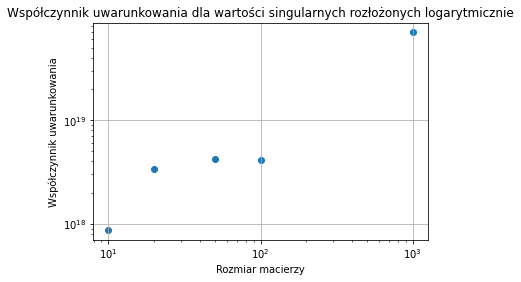

In [26]:
def log_sing_value(n:int, min_order:Union[int,float], max_order:Union[int,float]):
    """Funkcja generująca wektor wartości singularnych rozłożonych w skali logarytmiczne
    
        Parameters:
         n(np.ndarray): rozmiar wektora wartości singularnych (n,), gdzie n>0
         min_order(int,float): rząd najmniejszej wartości w wektorze wartości singularnych
         max_order(int,float): rząd największej wartości w wektorze wartości singularnych
         Results:
         np.ndarray - wektor nierosnących wartości logarytmicznych o wymiarze (n,) zawierający wartości logarytmiczne na zadanym przedziale
         """
    if isinstance(n, int) and isinstance(min_order, (int, float)) and isinstance(max_order, (int, float)):
        if max_order > min_order and n > 0:
            return np.flip(np.logspace(min_order, max_order, n))
        else:
            return None
    else:
        return None
    
def order_sing_value(n:int, order:Union[int,float] = 2, site:str = 'gre'):
    """Funkcja generująca wektor losowych wartości singularnych (n,) będących wartościami zmiennoprzecinkowymi losowanymi przy użyciu funkcji np.random.rand(n)*10. 
        A następnie ustawiająca wartość minimalną (site = 'low') albo maksymalną (site = 'gre') na wartość o  10**order razy mniejszą/większą.
    
        Parameters:
        n(np.ndarray): rozmiar wektora wartości singularnych (n,), gdzie n>0
        order(int,float): rząd przeskalowania wartości skrajnej
        site(str): zmienna wskazująca stronnę zmiany:
            - site = 'low' -> sing_value[-1] * 10**order
            - site = 'gre' -> sing_value[0] * 10**order
        
        Results:
        np.ndarray - wektor wartości singularnych o wymiarze (n,) zawierający wartości logarytmiczne na zadanym przedziale
        """
    if isinstance(n, int) and isinstance(order, (int, float)) and isinstance(site, str):
        if n > 0:
            vector = np.random.rand(n)*10
            if site == "gre":
                max_idx = np.argmax(vector)
                vector[max_idx] += 10 ** order
            elif site == 'low':
                min_idx = np.argmin(vector)
                vector[min_idx] -= 10 ** order
            else:
                return None
            sorted = np.sort(vector)
            return np.flip(sorted)
        else:
            return None    
    else:
        return None

def create_matrix_from_A(A:np.ndarray, sing_value:np.ndarray):
    """Funkcja generująca rozkład SVD dla macierzy A i zwracająca otworzenie macierzy A z wykorzystaniem zdefiniowanego wektora warości singularnych

            Parameters:
            A(np.ndarray): rozmiarz macierzy A (m,m)
            sing_value(np.ndarray): wektor wartości singularnych (m,)


            Results:
            np.ndarray: macierz (m,m) utworzoną na podstawie rozkładu SVD zadanej macierzy A z podmienionym wektorem wartości singularnych na wektor sing_valu """
    if isinstance(A, np.ndarray) and isinstance(sing_value, np.ndarray):
        if A.shape[0] == sing_value.shape[0] and A.shape[1] == A.shape[0]:
            U, _, V = np.linalg.svd(A)
            return np.dot(U * sing_value, V)
        else:
            return None
    else:
        return None

m = [10, 20, 50, 100, 1000]
matrix_log = []
matrix_gre = []
matrix_low = []

for size in m:
    A, b = main.random_matrix_Ab(size)
    sing_log = main.log_sing_value(size, 0, 100)
    sing_gre = main.order_sing_value(size, site = "gre")
    sing_low = main.order_sing_value(size, site = "low")

    A_log = main.create_matrix_from_A(A, sing_log)
    matrix_log.append(np.linalg.cond(A_log))

    A_gre = main.create_matrix_from_A(A, sing_gre)
    matrix_gre.append(np.linalg.cond(A_gre))

    A_low = main.create_matrix_from_A(A, sing_log)
    matrix_low.append(np.linalg.cond(A_low))

plt.scatter(m, matrix_log)
plt.title("Współczynnik uwarunkowania dla wartości singularnych rozłożonych logarytmicznie")
plt.xlabel('Rozmiar macierzy')
plt.ylabel("Współczynnik uwarunkowania")
plt.xscale("log")
plt.yscale("log")
plt.grid()

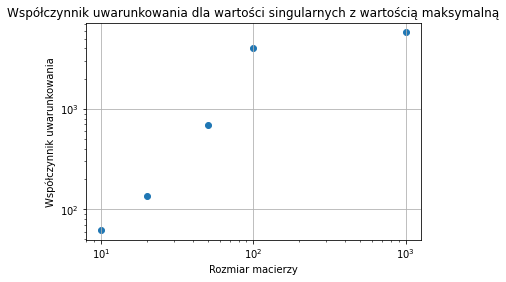

In [27]:
plt.scatter(m, matrix_gre)
plt.title("Współczynnik uwarunkowania dla wartości singularnych z wartością maksymalną")
plt.xlabel('Rozmiar macierzy')
plt.ylabel("Współczynnik uwarunkowania")
plt.xscale("log")
plt.yscale("log")
plt.grid()

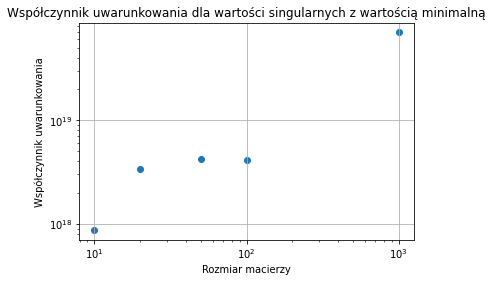

In [28]:
plt.scatter(m, matrix_low)
plt.title("Współczynnik uwarunkowania dla wartości singularnych z wartością minimalną")
plt.xlabel('Rozmiar macierzy')
plt.ylabel("Współczynnik uwarunkowania")
plt.xscale("log")
plt.yscale("log")
plt.grid()

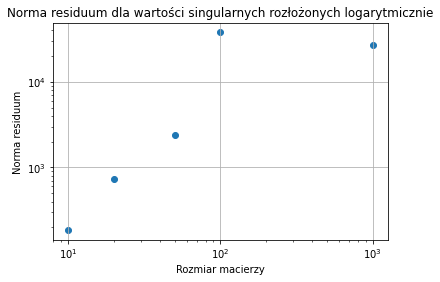

In [30]:
m = [10, 20, 50, 100, 1000]
matrix_log = []
matrix_gre = []
matrix_low = []

for size in m:
    A, b = main.random_matrix_Ab(size)
    sing_log = main.log_sing_value(size, 0, 100)
    sing_gre = main.order_sing_value(size, site = "gre")
    sing_low = main.order_sing_value(size, site = "low")

    A_log = main.create_matrix_from_A(A, sing_log)
    x = np.linalg.solve(A_log, b)
    matrix_log.append(main.residual_norm(A_log, x, b))

    A_gre = main.create_matrix_from_A(A, sing_gre)
    x = np.linalg.solve(A_gre, b)
    matrix_gre.append(main.residual_norm(A_gre, x, b))

    A_low = main.create_matrix_from_A(A, sing_low)
    x = np.linalg.solve(A_low, b)
    matrix_low.append(main.residual_norm(A_low, x, b))

plt.scatter(m, matrix_log)
plt.title("Norma residuum dla wartości singularnych rozłożonych logarytmicznie")
plt.xlabel('Rozmiar macierzy')
plt.ylabel("Norma residuum")
plt.xscale("log")
plt.yscale("log")
plt.grid()

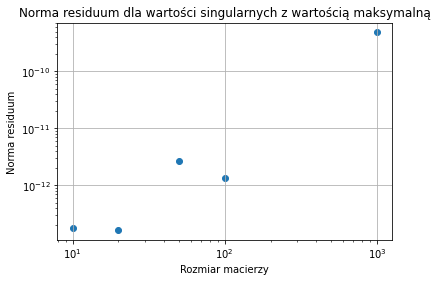

In [31]:
plt.scatter(m, matrix_gre)
plt.title("Norma residuum dla wartości singularnych z wartością maksymalną")
plt.xlabel('Rozmiar macierzy')
plt.ylabel("Norma residuum")
plt.xscale("log")
plt.yscale("log")
plt.grid()

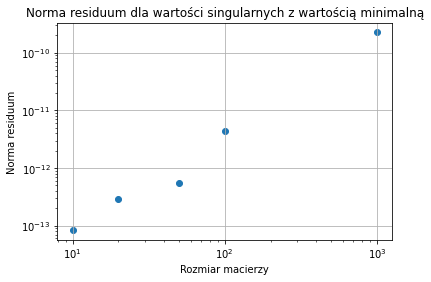

In [32]:
plt.scatter(m, matrix_low)
plt.title("Norma residuum dla wartości singularnych z wartością minimalną")
plt.xlabel('Rozmiar macierzy')
plt.ylabel("Norma residuum")
plt.xscale("log")
plt.yscale("log")
plt.grid()

Zaimplementowano funkcję log_sing_value, która zwraca wektor nierosnących wartości singularnych w przestrzeni logarytmicznej, oraz funkcję order_sing_value, która zwraca wektor nierosnących wartości, gdzie jedna wartość jest znacznie większa/mniejsza od drugiej (w zależności od podanego parametru). Poza tym zaimplementowano funkcję create_matrix_from_A, która dla zadanej macierzy A z zadania 1 i wektorów wartości singularnych z punktu 1 tego zadania zwraca odtworzoną macierz z podmienionym wektorem wartości singularnych, przy pomocy metody SVD.

W dalszej części zadania obliczono współczynnik uwarunkowania dla otrzymanych macierzy.

Ad.4 - Nie jest konieczne wyliczanie macierzy jeśli znamy wartości singularne. Wystarczy obliczyć współczynnik ze wzoru $\kappa = \frac{s_1}{s_n}$

Dla każdego m sporządzono wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy.


Wnioski:

Laboratoria umożliwiły zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. Pozwoliły także utrwalić wiedzę, czym jest uwarunkowanie macierzy, norma residuum oraz wektor wartości singularnych.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)